# SETUP AND INSTALLATION

In [1]:

!pip install roboflow kagglehub --quiet

import os
import pandas as pd
import numpy as np
import tensorflow as tf
from roboflow import Roboflow
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

print("done..")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 110.9 MB/s eta 0:00:00
done..


# download datasets

In [2]:
# Dictionary to hold the paths to our downloaded data
paths = {}

try:
    # --- Roboflow Downloads ---
    from roboflow import Roboflow
    rf = Roboflow(api_key="Z2BdotJhyaVVEojm45J8") # Using the key from the original notebook

    print("--- Downloading Original Datasets ---")
    print("  -> Downloading Graffiti dataset...")
    project = rf.workspace("hruts-workspace").project("graffiti-l6az9")
    dataset = project.version(1).download("yolov8")
    paths['graffiti'] = dataset.location

    print("  -> Downloading Damaged Construction (Concrete) dataset...")
    project = rf.workspace("road-ywxxe").project("concrete-pugqq")
    dataset = project.version(3).download("yolov8")
    paths['concrete'] = dataset.location

    print("  -> Downloading Damaged Signs (HIND) dataset...")
    project = rf.workspace("road-inspection").project("damaged-signs-hind")
    dataset = project.version(2).download("yolov8")
    paths['signs_hind'] = dataset.location

    print("\n--- Downloading and Aggregating Datasets for Minority Classes ---")

    # PARKING DATASETS
    print("  -> Downloading Parking (Original)...")
    project = rf.workspace("parking-amu50").project("illegal-parking")
    dataset = project.version(5).download("yolov8")
    paths['parking_original'] = dataset.location

    print("  -> Downloading Parking (New 1)...")
    project = rf.workspace("hao-61fh1").project("illegal-parking-xtkyr")
    dataset = project.version(1).download("yolov8")
    paths['parking_new_1'] = dataset.location

    # POTHOLE DATASETS
    print("  -> Downloading Potholes (Original)...")
    project = rf.workspace("road-holes").project("road-holes-iow4h")
    dataset = project.version(1).download("yolov8")
    paths['potholes_original'] = dataset.location

    print("  -> Downloading Potholes (New 1)...")
    project = rf.workspace("evansworkspace").project("pothole-ek")
    dataset = project.version(1).download("yolov8")
    paths['potholes_new_1'] = dataset.location

    # TRASH DATASETS
    print("  -> Downloading Trash (Original)...")
    project = rf.workspace("trash-drone").project("domestic-trash-ryw1h")
    dataset = project.version(2).download("yolov8")
    paths['trash_original'] = dataset.location

    print("  -> Downloading Trash (New 1)...")
    project = rf.workspace("datacluster-labs-agryi").project("domestic-trash")
    dataset = project.version(1).download("yolov8")
    paths['trash_new_1'] = dataset.location


    print("\nAll datasets downloaded successfully!")
    for name, path in paths.items():
        print(f"  - {name}: {path}")

except Exception as e:
    print(f"\n An error occurred during download: {e}")

--- Downloading Original Datasets ---
  -> Downloading Graffiti dataset...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Graffiti-1 in yolov8:: 100%|██████████| 4268/4268 [00:01<00:00, 3481.00it/s]


  -> Downloading Damaged Construction (Concrete) dataset...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to concrete-3 in yolov8:: 100%|██████████| 1992/1992 [00:00<00:00, 2230.70it/s]


  -> Downloading Damaged Signs (HIND) dataset...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to damaged-signs-Hind-2 in yolov8:: 100%|██████████| 4830/4830 [00:00<00:00, 7470.29it/s]



--- Downloading and Aggregating Datasets for Minority Classes ---
  -> Downloading Parking (Original)...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Illegal-Parking-5 in yolov8:: 100%|██████████| 220/220 [00:00<00:00, 5871.95it/s]

  -> Downloading Parking (New 1)...
loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to illegal-parking-1 in yolov8:: 100%|██████████| 4238/4238 [00:00<00:00, 7927.86it/s]


  -> Downloading Potholes (Original)...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-holes-1 in yolov8:: 100%|██████████| 378/378 [00:00<00:00, 7669.80it/s]

  -> Downloading Potholes (New 1)...
loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to pothole-ek-1 in yolov8:: 100%|██████████| 1058/1058 [00:00<00:00, 5870.25it/s]


  -> Downloading Trash (Original)...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Domestic-trash-2 in yolov8:: 100%|██████████| 508/508 [00:00<00:00, 6422.76it/s]

  -> Downloading Trash (New 1)...
loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to Domestic-Trash--1 in yolov8:: 100%|██████████| 508/508 [00:03<00:00, 163.54it/s]


All datasets downloaded successfully!
  - graffiti: /content/Graffiti-1
  - concrete: /content/concrete-3
  - signs_hind: /content/damaged-signs-Hind-2
  - parking_original: /content/Illegal-Parking-5
  - parking_new_1: /content/illegal-parking-1
  - potholes_original: /content/Road-holes-1
  - potholes_new_1: /content/pothole-ek-1
  - trash_original: /content/Domestic-trash-2
  - trash_new_1: /content/Domestic-Trash--1


# Process dataset

In [3]:
all_data = []

def process_yolo_folder(path, label, data_list):
    """Processes folders with train/valid/test subdirectories."""
    if path is None: return # Skip if a dataset failed to download
    for split in ["train", "valid", "test"]:
        image_path = os.path.join(path, f"{split}/images")
        print(f"  -> Processing: {image_path} for label: {label}")
        try:
            if not os.path.exists(image_path):
                print(f"    --> WARNING: Path does not exist. Skipping.")
                continue
            for img_file in os.listdir(image_path):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    data_list.append({'filepath': os.path.join(image_path, img_file), 'label': label})
        except Exception as e:
            print(f"    --> ERROR processing {path}: {e}")

# Process majority class datasets
process_yolo_folder(paths.get('graffiti'), "Vandalism_Graffiti", all_data)
process_yolo_folder(paths.get('signs_hind'), "Road_Issues_Damaged_Sign", all_data)
process_yolo_folder(paths.get('concrete'), "Infrastructure_Damage_Concrete", all_data)

# Aggregate original and new datasets for the augmented classes
process_yolo_folder(paths.get('parking_original'), "Parking_Issues_Illegal_Parking", all_data)
process_yolo_folder(paths.get('parking_new_1'), "Parking_Issues_Illegal_Parking", all_data)

process_yolo_folder(paths.get('potholes_original'), "Road_Issues_Pothole", all_data)
process_yolo_folder(paths.get('potholes_new_1'), "Road_Issues_Pothole", all_data)

# Correctly combining all three sources for Domestic Trash
process_yolo_folder(paths.get('trash_original'), "Domestic_trash", all_data)
process_yolo_folder(paths.get('trash_new_1'), "Domestic_trash", all_data)

# Create the initial raw DataFrame
df_raw = pd.DataFrame(all_data)

if not df_raw.empty:
    print("\nInitial DataFrame created successfully.")
    print(f"Total raw images found: {len(df_raw)}")
    print("\n New (Imbalanced) Label Distribution:")
    print(df_raw['label'].value_counts())
else:
    print("\nError: No data was loaded. Please check the download paths.")

  -> Processing: /content/Graffiti-1/train/images for label: Vandalism_Graffiti
  -> Processing: /content/Graffiti-1/valid/images for label: Vandalism_Graffiti
  -> Processing: /content/Graffiti-1/test/images for label: Vandalism_Graffiti
  -> Processing: /content/damaged-signs-Hind-2/train/images for label: Road_Issues_Damaged_Sign
  -> Processing: /content/damaged-signs-Hind-2/valid/images for label: Road_Issues_Damaged_Sign
  -> Processing: /content/damaged-signs-Hind-2/test/images for label: Road_Issues_Damaged_Sign
  -> Processing: /content/concrete-3/train/images for label: Infrastructure_Damage_Concrete
  -> Processing: /content/concrete-3/valid/images for label: Infrastructure_Damage_Concrete
  -> Processing: /content/concrete-3/test/images for label: Infrastructure_Damage_Concrete
  -> Processing: /content/Illegal-Parking-5/train/images for label: Parking_Issues_Illegal_Parking
  -> Processing: /content/Illegal-Parking-5/valid/images for label: Parking_Issues_Illegal_Parking
 

# Balanced using oversampling

In [4]:
if not df_raw.empty:
    # Find the size of the largest class from our newly aggregated data
    max_size = df_raw['label'].value_counts().max()
    print(f" Target size for each class (based on the largest) will be: {max_size}")

    # Use scikit-learn's resample() to perform oversampling
    df_balanced_list = []
    for class_label in df_raw['label'].unique():
        df_class = df_raw[df_raw['label'] == class_label]

        # If the class is already the largest, no need to resample, just add it
        if len(df_class) == max_size:
            df_balanced_list.append(df_class)
            continue

        df_class_oversampled = resample(df_class,
                                        replace=True,     # Create copies of images
                                        n_samples=max_size,
                                        random_state=42)  # for reproducibility
        df_balanced_list.append(df_class_oversampled)

    # Combine the oversampled classes into a single, balanced DataFrame
    df_balanced = pd.concat(df_balanced_list)

    print("\n New balanced label distribution:")
    print(df_balanced['label'].value_counts())
    print(f"\nTotal images for training after balancing: {len(df_balanced)}")
else:
    print("\nSkipping balancing because the initial dataframe is empty.")

 Target size for each class (based on the largest) will be: 2409

 New balanced label distribution:
label
Vandalism_Graffiti                2409
Road_Issues_Damaged_Sign          2409
Infrastructure_Damage_Concrete    2409
Parking_Issues_Illegal_Parking    2409
Road_Issues_Pothole               2409
Domestic_trash                    2409
Name: count, dtype: int64

Total images for training after balancing: 14454


#  ANONYMIZE DATA

In [5]:
import cv2
import numpy as np
import os

# --- Face Detector Setup ---
face_cascade_file = 'haarcascade_frontalface_default.xml'
if not os.path.exists(face_cascade_file):
    print("Downloading face detector model...")
    !wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

# --- License Plate Detector Setup ---
plate_cascade_file = 'haarcascade_russian_plate_number.xml'
if not os.path.exists(plate_cascade_file):
    print("Downloading license plate detector model...")
    !wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml

# Load both cascade classifiers
face_cascade = cv2.CascadeClassifier(face_cascade_file)
plate_cascade = cv2.CascadeClassifier(plate_cascade_file)
print("Face and license plate detectors loaded.")

def anonymize_image(img_array):
    """
    Takes a NumPy array of an image, finds faces AND license plates, blurs them,
    and returns the anonymized image array.
    """
    # Convert image to BGR for OpenCV processing
    img_bgr = cv2.cvtColor(img_array.astype(np.uint8), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # --- 1. Detect and blur faces ---
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        face_roi = img_bgr[y:y+h, x:x+w]
        blurred_face = cv2.GaussianBlur(face_roi, (99, 99), 30)
        img_bgr[y:y+h, x:x+w] = blurred_face

    # --- 2. Detect and blur license plates ---
    plates = plate_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in plates:
        plate_roi = img_bgr[y:y+h, x:x+w]
        blurred_plate = cv2.GaussianBlur(plate_roi, (99, 99), 30)
        img_bgr[y:y+h, x:x+w] = blurred_plate

    # Convert back to RGB and cast to float32 for the ImageDataGenerator
    # THIS IS THE CORRECTED LINE
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB).astype(np.float32)

Face and license plate detectors loaded.


Please upload up to 3 images with faces or license plates to test anonymization.


Saving driving-highway.jpg to driving-highway.jpg
Saving NumberPlates-scaled.jpeg to NumberPlates-scaled.jpeg
Saving pexels-simon-robben-55958-614810.jpg to pexels-simon-robben-55958-614810.jpg

--- Processing 'driving-highway.jpg' ---


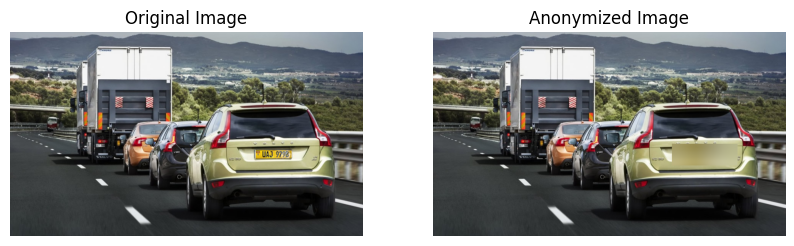


--- Processing 'NumberPlates-scaled.jpeg' ---


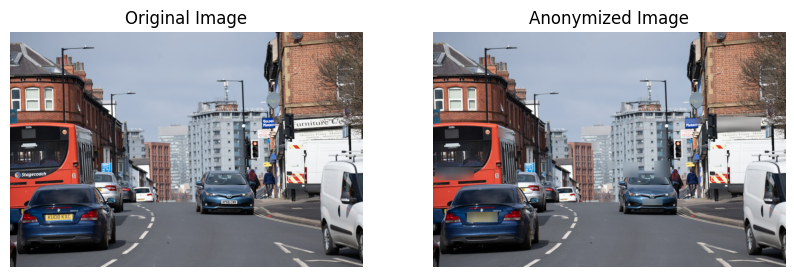


--- Processing 'pexels-simon-robben-55958-614810.jpg' ---


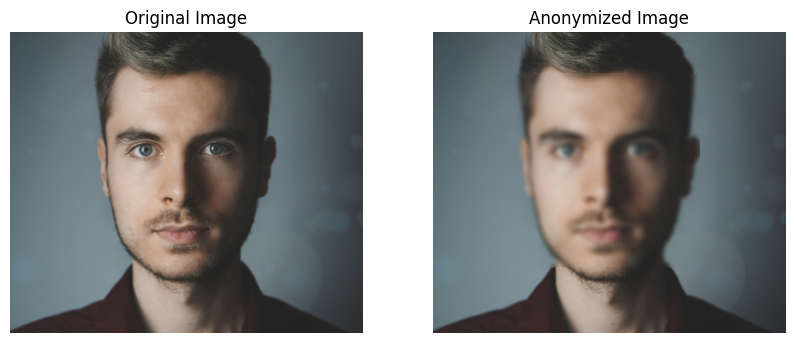

In [6]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

# A check to ensure the anonymize_image function is available
if 'anonymize_image' not in locals():
    print(" Error: The 'anonymize_image' function cell was not run. Please run it first.")
else:
    print("Please upload up to 3 images with faces or license plates to test anonymization.")
    # Upload files from your local drive
    uploaded = files.upload()

    # Process and display each uploaded image
    for filename in uploaded.keys():
        print(f"\n--- Processing '{filename}' ---")
        try:
            # Read the uploaded image using OpenCV
            img_data = uploaded[filename]
            img_array = np.frombuffer(img_data, np.uint8)
            img_bgr = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

            # Convert from BGR (OpenCV default) to RGB for our function and Matplotlib
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

            # Run the anonymization function
            anonymized_rgb = anonymize_image(img_rgb)

            # Display side-by-side for comparison
            plt.figure(figsize=(10, 5))

            # Original Image
            plt.subplot(1, 2, 1)
            plt.imshow(img_rgb)
            plt.title("Original Image")
            plt.axis('off')

            # Anonymized Image
            plt.subplot(1, 2, 2)
            # Convert the float array back to uint8 for correct display
            plt.imshow(anonymized_rgb.astype(np.uint8))
            plt.title("Anonymized Image")
            plt.axis('off')

            plt.show()

        except Exception as e:
            print(f"Could not process image {filename}. Error: {e}")

#  PREPARE DATA FOR TRAINING

In [7]:
print("\nSplitting data into Train, Validation, and Test sets...")

# First, split the balanced data into a 90% block (for training+validation) and a 10% block (for testing)
train_val_df, test_df = train_test_split(
    df_balanced,
    test_size=0.10, # 10% for the final test set
    random_state=42,
    stratify=df_balanced['label']
)

# Next, split the 90% block into training and validation sets.
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.111, # This makes the validation set ~10% of the original total data
    random_state=42,
    stratify=train_val_df['label']
)

print(f"\nTotal balanced samples: {len(df_balanced)}")
print(f" -> Training samples:   {len(train_df)}")
print(f" -> Validation samples: {len(val_df)}")
print(f" -> Test samples:       {len(test_df)}")

# Create Data Generators with Augmentation and our Anonymization function
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=anonymize_image
)

val_test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=anonymize_image
)

IMG_SIZE = (128, 128)
BATCH_SIZE = 64

# Create all three generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)
print("\nTrain, Validation, and Test generators created successfully with anonymization.")


# --- EXPORT THE DATAFRAME SPLITS TO CSV FILES ---
# This part goes at the end of this cell because it needs train_df, val_df, and test_df.
print("\nExporting DataFrame splits to CSV files...")
try:
    train_df.to_csv('train.csv', index=False)
    val_df.to_csv('validate.csv', index=False)
    test_df.to_csv('test.csv', index=False)
    print("train.csv, validate.csv, and test.csv have been created successfully.")
except Exception as e:
    print(f"Error exporting to CSV: {e}")


Splitting data into Train, Validation, and Test sets...

Total balanced samples: 14454
 -> Training samples:   11564
 -> Validation samples: 1444
 -> Test samples:       1446
Found 11564 validated image filenames belonging to 6 classes.
Found 1444 validated image filenames belonging to 6 classes.
Found 1446 validated image filenames belonging to 6 classes.

Train, Validation, and Test generators created successfully with anonymization.

Exporting DataFrame splits to CSV files...
train.csv, validate.csv, and test.csv have been created successfully.


# BUILD AND COMPILE THE MODEL

In [8]:
if 'train_generator' in locals():
    print("\n  Building the CNN Model...")

    num_classes = len(df_balanced['label'].unique())
    print(f"Number of classes for output layer: {num_classes}")

    model = tf.keras.models.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Second Convolutional Block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Third Convolutional Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Dense Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5), # Dropout for regularization
        tf.keras.layers.Dense(num_classes, activation='softmax') # Softmax for multi-class
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()
else:
    print("\nSkipping model building because data generators are not ready.")


  Building the CNN Model...
Number of classes for output layer: 6


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,941,894 (49.37 MB)

 Trainable params: 12,941,894 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

# train model

In [ ]:
if 'model' in locals():
    print("\nStarting Model Training...")

    # Callbacks for smarter training
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('MlArtist_model.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
    ]

    EPOCHS = 30 # Train epochs

    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks=callbacks
    )

else:
    print("\nSkipping training because the model was not built.")


Starting Model Training...


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4797 - loss: 1.3166

181/181 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.4804 - loss: 1.3149 - val_accuracy: 0.7735 - val_loss: 0.6322 - learning_rate: 0.0010
Epoch 2/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7471 - loss: 0.6798

181/181 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.7472 - loss: 0.6796 - val_accuracy: 0.8075 - val_loss: 0.5463 - learning_rate: 0.0010
Epoch 3/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.7989 - loss: 0.5535 - val_accuracy: 0.7964 - val_loss: 0.6185 - learning_rate: 0.0010
Epoch 4/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8157 - loss: 0.5096

181/181 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.8157 - loss: 0.5096 - val_accuracy: 0.8456 - val_loss: 0.4615 - learning_rate: 0.0010
Epoch 5/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.8572 - loss: 0.4026 - val_accuracy: 0.8338 - val_loss: 0.4382 - learning_rate: 0.0010
Epoch 6/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.8645 - loss: 0.3741 - val_accuracy: 0.8206 - val_loss: 0.5939 - learning_rate: 0.0010
Epoch 7/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8782 - loss: 0.3482

181/181 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.8782 - loss: 0.3481 - val_accuracy: 0.8760 - val_loss: 0.3741 - learning_rate: 0.0010
Epoch 8/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8785 - loss: 0.3322

181/181 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.8785 - loss: 0.3322 - val_accuracy: 0.8774 - val_loss: 0.3936 - learning_rate: 0.0010
Epoch 9/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.8976 - loss: 0.2871 - val_accuracy: 0.8677 - val_loss: 0.3910 - learning_rate: 0.0010
Epoch 10/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9026 - loss: 0.2844

181/181 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.9026 - loss: 0.2845 - val_accuracy: 0.8968 - val_loss: 0.3049 - learning_rate: 0.0010
Epoch 11/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.9012 - loss: 0.2610 - val_accuracy: 0.8753 - val_loss: 0.5010 - learning_rate: 0.0010
Epoch 12/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9125 - loss: 0.2431

181/181 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9125 - loss: 0.2431 - val_accuracy: 0.9141 - val_loss: 0.2665 - learning_rate: 0.0010
Epoch 13/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9166 - loss: 0.2359

181/181 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9166 - loss: 0.2359 - val_accuracy: 0.9217 - val_loss: 0.2798 - learning_rate: 0.0010
Epoch 14/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9301 - loss: 0.2135

181/181 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.9301 - loss: 0.2134 - val_accuracy: 0.9411 - val_loss: 0.1693 - learning_rate: 0.0010
Epoch 15/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.9255 - loss: 0.2104 - val_accuracy: 0.9280 - val_loss: 0.2092 - learning_rate: 0.0010
Epoch 16/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9280 - loss: 0.2017 - val_accuracy: 0.9127 - val_loss: 0.3267 - learning_rate: 0.0010
Epoch 17/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9239 - loss: 0.2189 - val_accuracy: 0.9391 - val_loss: 0.2183 - learning_rate: 0.0010
Epoch 18/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9507 - loss: 0.1400 - val_accuracy: 0.9404 - val_loss: 0.1784 - learning_rate: 2.0000e-04
Epoch 19/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9597 - loss: 0.1192

181/181 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.9597 - loss: 0.1192 - val_accuracy: 0.9571 - val_loss: 0.1400 - learning_rate: 2.0000e-04
Epoch 20/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9588 - loss: 0.1168 - val_accuracy: 0.9460 - val_loss: 0.1771 - learning_rate: 2.0000e-04
Epoch 21/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9657 - loss: 0.1086

181/181 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.9657 - loss: 0.1086 - val_accuracy: 0.9591 - val_loss: 0.1226 - learning_rate: 2.0000e-04
Epoch 22/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.9645 - loss: 0.1041 - val_accuracy: 0.9550 - val_loss: 0.1392 - learning_rate: 2.0000e-04
Epoch 23/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9612 - loss: 0.1051

181/181 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.9612 - loss: 0.1051 - val_accuracy: 0.9605 - val_loss: 0.1159 - learning_rate: 2.0000e-04
Epoch 24/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9654 - loss: 0.0977 - val_accuracy: 0.9584 - val_loss: 0.1347 - learning_rate: 2.0000e-04
Epoch 25/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9687 - loss: 0.0938 - val_accuracy: 0.9529 - val_loss: 0.1647 - learning_rate: 2.0000e-04
Epoch 26/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9667 - loss: 0.1015 - val_accuracy: 0.9584 - val_loss: 0.1291 - learning_rate: 2.0000e-04
Epoch 27/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9704 - loss: 0.0836

181/181 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9704 - loss: 0.0836 - val_accuracy: 0.9640 - val_loss: 0.1165 - learning_rate: 4.0000e-05
Epoch 28/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9705 - loss: 0.0830

181/181 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 0.9705 - loss: 0.0830 - val_accuracy: 0.9654 - val_loss: 0.1150 - learning_rate: 4.0000e-05
Epoch 29/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.9716 - loss: 0.0765 - val_accuracy: 0.9647 - val_loss: 0.1131 - learning_rate: 4.0000e-05
Epoch 30/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9739 - loss: 0.0807 - val_accuracy: 0.9633 - val_loss: 0.1217 - learning_rate: 4.0000e-05


# EVALUATE AND VISUALIZE


Plotting training history...


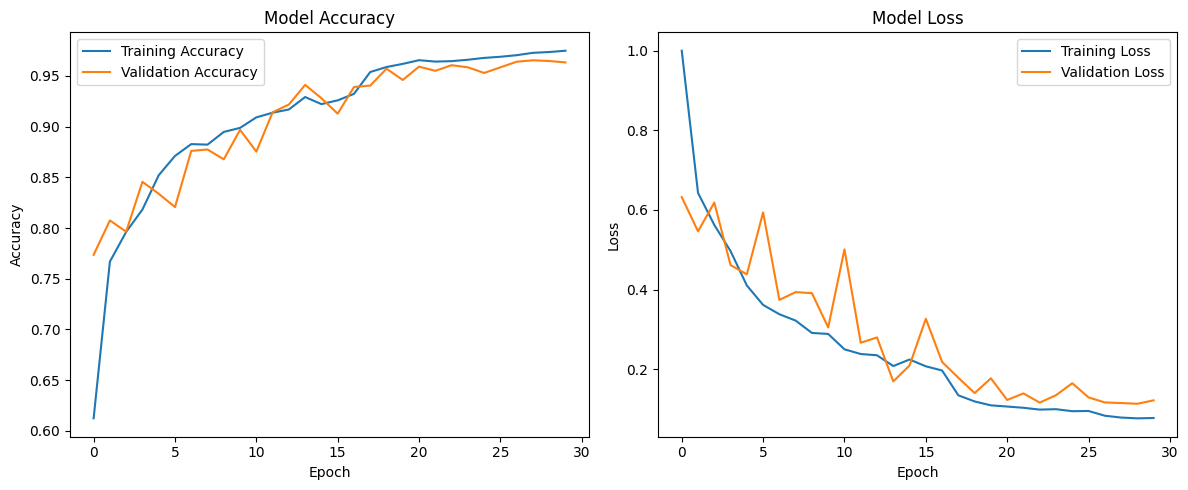


Final evaluation on the unseen Test data:


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


  -> Test Accuracy: 97.72%
  -> Test Loss: 0.0730

Classification Report on Test Data:
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step
                                precision    recall  f1-score   support

                Domestic_trash       0.99      1.00      1.00       241
Infrastructure_Damage_Concrete       0.97      1.00      0.99       241
Parking_Issues_Illegal_Parking       0.99      0.98      0.99       241
      Road_Issues_Damaged_Sign       1.00      0.97      0.98       241
           Road_Issues_Pothole       0.96      0.98      0.97       241
            Vandalism_Graffiti       0.95      0.94      0.95       241

                      accuracy                           0.98      1446
                     macro avg       0.98      0.98      0.98      1446
                  weighted avg       0.98      0.98      0.98      1446



In [ ]:
from sklearn.metrics import classification_report

if 'history' in locals():
    print("\nPlotting training history...")

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # --- Final evaluation on the UNSEEN TEST DATA ---
    print("\nFinal evaluation on the unseen Test data:")
    # Load the best performing model saved by ModelCheckpoint
    best_model = tf.keras.models.load_model('MlArtist_model.h5')

    # Evaluate using the test_generator
    test_loss, test_accuracy = best_model.evaluate(test_generator, verbose=0)
    print(f"  -> Test Accuracy: {test_accuracy*100:.2f}%")
    print(f"  -> Test Loss: {test_loss:.4f}")

    # --- Classification Report on the UNSEEN TEST DATA ---
    print("\nClassification Report on Test Data:")
    # Get predictions from the test generator
    y_pred = best_model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get true labels from the test generator
    y_true = test_generator.classes

    # Get class labels
    class_labels = list(test_generator.class_indices.keys())

    print(classification_report(y_true, y_pred_classes, target_names=class_labels))

else:
    print("\nSkipping evaluation because training was not completed.")

#save model as pickle

In [ ]:
import pickle


pickle_filename = 'MlArtist_FinalModel.pkl'

print(f"Saving model to {pickle_filename}...")

with open(pickle_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(" Model successfully saved as a pickle file.")

Saving model to MlArtist_FinalModel.pkl...
 Model successfully saved as a pickle file.


# prediction

Loading model from MlArtist_FinalModel.pkl...
 Best trained model loaded successfully from pickle file.

Ready to predict! Use the button below to upload an image.


Saving garbage.avif to garbage.avif

--- Analyzing 'garbage.avif' ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step

 Anonymized Input Image:


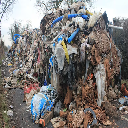


 Prediction Result:
  - Main Category: Domestic
  - Sub Category:  trash
  - Confidence:    96.62%


In [12]:
import pickle

# --- Load Model from Pickle File ---
try:
    # Define the pickle filename
    pickle_filename = 'MlArtist_FinalModel.pkl'
    print(f"Loading model from {pickle_filename}...")

    # Open the file in read-binary mode and load the model
    with open(pickle_filename, 'rb') as file:
        best_model = pickle.load(file)

    print(" Best trained model loaded successfully from pickle file.")
except Exception as e:
    print(f" Error loading model from pickle file: {e}")
    best_model = None


# --- Prediction Function ---
# This function uses the global 'anonymize_image' function defined in a previous cell.
def predict_on_upload(model_to_use, train_gen):
    if model_to_use is None:
        print("Model is not loaded. Cannot predict.")
        return

    # Create the label map from the training generator
    class_indices = train_gen.class_indices
    labels_map = {v: k for k, v in class_indices.items()}

    # Upload files
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"\n--- Analyzing '{filename}' ---")
        try:
            # Load the image for processing
            img = tf.keras.preprocessing.image.load_img(filename, target_size=(128, 128))
            img_array_rgb = tf.keras.preprocessing.image.img_to_array(img)

            # Anonymize the image using our function (which returns a float32 array)
            anonymized_array_float = anonymize_image(img_array_rgb)

            # Prepare the image for the model (rescale and add batch dimension)
            img_batch = np.expand_dims(anonymized_array_float, axis=0)
            img_preprocessed = img_batch / 255.0  # Rescale float[0,255] to float[0,1]

            # Make the prediction
            prediction = model_to_use.predict(img_preprocessed)

            predicted_index = np.argmax(prediction[0])
            predicted_label = labels_map[predicted_index]
            confidence = np.max(prediction[0]) * 100

            main_category, sub_category = predicted_label.split('_', 1)

            # --- Display the results ---
            print("\n Anonymized Input Image:")

            # For display, convert the float array back to a uint8 BGR image for cv2_imshow
            display_img_uint8 = anonymized_array_float.astype(np.uint8)
            display_img_bgr = cv2.cvtColor(display_img_uint8, cv2.COLOR_RGB2BGR)
            cv2_imshow(display_img_bgr)

            print(f"\n Prediction Result:")
            print(f"  - Main Category: {main_category}")
            print(f"  - Sub Category:  {sub_category.replace('_', ' ')}")
            print(f"  - Confidence:    {confidence:.2f}%")

        except Exception as e:
            print(f"Error processing {filename}: {e}")


# --- Run Prediction ---
# This check ensures that the model has been loaded and the generators exist
if 'best_model' in locals() and best_model is not None and 'train_generator' in locals():
    print("\nReady to predict! Use the button below to upload an image.")
    predict_on_upload(best_model, train_generator)
else:
    print("\nCannot run prediction. Ensure the model was trained and data generators were created.")

Loading model from MlArtist_FinalModel.pkl...
 Best trained model loaded successfully from pickle file.

Ready to predict! Use the button below to upload an image.


Saving illegal_park.jpg to illegal_park.jpg

--- Analyzing 'illegal_park.jpg' ---


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step

 Anonymized Input Image:


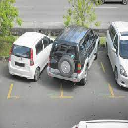


 Prediction Result:
  - Main Category: Parking
  - Sub Category:  Issues Illegal Parking
  - Confidence:    86.98%


In [13]:
# --- Load Model from Pickle File ---
try:
    # Define the pickle filename
    pickle_filename = 'MlArtist_FinalModel.pkl'
    print(f"Loading model from {pickle_filename}...")

    # Open the file in read-binary mode and load the model
    with open(pickle_filename, 'rb') as file:
        best_model = pickle.load(file)

    print(" Best trained model loaded successfully from pickle file.")
except Exception as e:
    print(f" Error loading model from pickle file: {e}")
    best_model = None


# --- Prediction Function ---
# This function uses the global 'anonymize_image' function defined in a previous cell.
def predict_on_upload(model_to_use, train_gen):
    if model_to_use is None:
        print("Model is not loaded. Cannot predict.")
        return

    # Create the label map from the training generator
    class_indices = train_gen.class_indices
    labels_map = {v: k for k, v in class_indices.items()}

    # Upload files
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"\n--- Analyzing '{filename}' ---")
        try:
            # Load the image for processing
            img = tf.keras.preprocessing.image.load_img(filename, target_size=(128, 128))
            img_array_rgb = tf.keras.preprocessing.image.img_to_array(img)

            # Anonymize the image using our function (which returns a float32 array)
            anonymized_array_float = anonymize_image(img_array_rgb)

            # Prepare the image for the model (rescale and add batch dimension)
            img_batch = np.expand_dims(anonymized_array_float, axis=0)
            img_preprocessed = img_batch / 255.0  # Rescale float[0,255] to float[0,1]

            # Make the prediction
            prediction = model_to_use.predict(img_preprocessed)

            predicted_index = np.argmax(prediction[0])
            predicted_label = labels_map[predicted_index]
            confidence = np.max(prediction[0]) * 100

            main_category, sub_category = predicted_label.split('_', 1)

            # --- Display the results ---
            print("\n Anonymized Input Image:")

            # For display, convert the float array back to a uint8 BGR image for cv2_imshow
            display_img_uint8 = anonymized_array_float.astype(np.uint8)
            display_img_bgr = cv2.cvtColor(display_img_uint8, cv2.COLOR_RGB2BGR)
            cv2_imshow(display_img_bgr)

            print(f"\n Prediction Result:")
            print(f"  - Main Category: {main_category}")
            print(f"  - Sub Category:  {sub_category.replace('_', ' ')}")
            print(f"  - Confidence:    {confidence:.2f}%")

        except Exception as e:
            print(f"Error processing {filename}: {e}")


# --- Run Prediction ---
# This check ensures that the model has been loaded and the generators exist
if 'best_model' in locals() and best_model is not None and 'train_generator' in locals():
    print("\nReady to predict! Use the button below to upload an image.")
    predict_on_upload(best_model, train_generator)
else:
    print("\nCannot run prediction. Ensure the model was trained and data generators were created.")

Loading model from MlArtist_FinalModel.pkl...
 Best trained model loaded successfully from pickle file.

Ready to predict! Use the button below to upload an image.


Saving Illegally-Parked-Car.jpg to Illegally-Parked-Car.jpg

--- Analyzing 'Illegally-Parked-Car.jpg' ---


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step

 Anonymized Input Image:


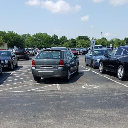


 Prediction Result:
  - Main Category: Parking
  - Sub Category:  Issues Illegal Parking
  - Confidence:    72.34%


In [14]:
# --- Load Model from Pickle File ---
try:
    # Define the pickle filename
    pickle_filename = 'MlArtist_FinalModel.pkl'
    print(f"Loading model from {pickle_filename}...")

    # Open the file in read-binary mode and load the model
    with open(pickle_filename, 'rb') as file:
        best_model = pickle.load(file)

    print(" Best trained model loaded successfully from pickle file.")
except Exception as e:
    print(f" Error loading model from pickle file: {e}")
    best_model = None


# --- Prediction Function ---
# This function uses the global 'anonymize_image' function defined in a previous cell.
def predict_on_upload(model_to_use, train_gen):
    if model_to_use is None:
        print("Model is not loaded. Cannot predict.")
        return

    # Create the label map from the training generator
    class_indices = train_gen.class_indices
    labels_map = {v: k for k, v in class_indices.items()}

    # Upload files
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"\n--- Analyzing '{filename}' ---")
        try:
            # Load the image for processing
            img = tf.keras.preprocessing.image.load_img(filename, target_size=(128, 128))
            img_array_rgb = tf.keras.preprocessing.image.img_to_array(img)

            # Anonymize the image using our function (which returns a float32 array)
            anonymized_array_float = anonymize_image(img_array_rgb)

            # Prepare the image for the model (rescale and add batch dimension)
            img_batch = np.expand_dims(anonymized_array_float, axis=0)
            img_preprocessed = img_batch / 255.0  # Rescale float[0,255] to float[0,1]

            # Make the prediction
            prediction = model_to_use.predict(img_preprocessed)

            predicted_index = np.argmax(prediction[0])
            predicted_label = labels_map[predicted_index]
            confidence = np.max(prediction[0]) * 100

            main_category, sub_category = predicted_label.split('_', 1)

            # --- Display the results ---
            print("\n Anonymized Input Image:")

            # For display, convert the float array back to a uint8 BGR image for cv2_imshow
            display_img_uint8 = anonymized_array_float.astype(np.uint8)
            display_img_bgr = cv2.cvtColor(display_img_uint8, cv2.COLOR_RGB2BGR)
            cv2_imshow(display_img_bgr)

            print(f"\n Prediction Result:")
            print(f"  - Main Category: {main_category}")
            print(f"  - Sub Category:  {sub_category.replace('_', ' ')}")
            print(f"  - Confidence:    {confidence:.2f}%")

        except Exception as e:
            print(f"Error processing {filename}: {e}")


# --- Run Prediction ---
# This check ensures that the model has been loaded and the generators exist
if 'best_model' in locals() and best_model is not None and 'train_generator' in locals():
    print("\nReady to predict! Use the button below to upload an image.")
    predict_on_upload(best_model, train_generator)
else:
    print("\nCannot run prediction. Ensure the model was trained and data generators were created.")

Loading model from MlArtist_FinalModel.pkl...
 Best trained model loaded successfully from pickle file.

Ready to predict! Use the button below to upload an image.


Saving pothole.jpg to pothole.jpg

--- Analyzing 'pothole.jpg' ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step

 Anonymized Input Image:


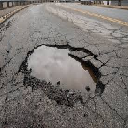


 Prediction Result:
  - Main Category: Road
  - Sub Category:  Issues Pothole
  - Confidence:    100.00%


In [15]:
# --- Load Model from Pickle File ---
try:
    # Define the pickle filename
    pickle_filename = 'MlArtist_FinalModel.pkl'
    print(f"Loading model from {pickle_filename}...")

    # Open the file in read-binary mode and load the model
    with open(pickle_filename, 'rb') as file:
        best_model = pickle.load(file)

    print(" Best trained model loaded successfully from pickle file.")
except Exception as e:
    print(f" Error loading model from pickle file: {e}")
    best_model = None


# --- Prediction Function ---
# This function uses the global 'anonymize_image' function defined in a previous cell.
def predict_on_upload(model_to_use, train_gen):
    if model_to_use is None:
        print("Model is not loaded. Cannot predict.")
        return

    # Create the label map from the training generator
    class_indices = train_gen.class_indices
    labels_map = {v: k for k, v in class_indices.items()}

    # Upload files
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"\n--- Analyzing '{filename}' ---")
        try:
            # Load the image for processing
            img = tf.keras.preprocessing.image.load_img(filename, target_size=(128, 128))
            img_array_rgb = tf.keras.preprocessing.image.img_to_array(img)

            # Anonymize the image using our function (which returns a float32 array)
            anonymized_array_float = anonymize_image(img_array_rgb)

            # Prepare the image for the model (rescale and add batch dimension)
            img_batch = np.expand_dims(anonymized_array_float, axis=0)
            img_preprocessed = img_batch / 255.0  # Rescale float[0,255] to float[0,1]

            # Make the prediction
            prediction = model_to_use.predict(img_preprocessed)

            predicted_index = np.argmax(prediction[0])
            predicted_label = labels_map[predicted_index]
            confidence = np.max(prediction[0]) * 100

            main_category, sub_category = predicted_label.split('_', 1)

            # --- Display the results ---
            print("\n Anonymized Input Image:")

            # For display, convert the float array back to a uint8 BGR image for cv2_imshow
            display_img_uint8 = anonymized_array_float.astype(np.uint8)
            display_img_bgr = cv2.cvtColor(display_img_uint8, cv2.COLOR_RGB2BGR)
            cv2_imshow(display_img_bgr)

            print(f"\n Prediction Result:")
            print(f"  - Main Category: {main_category}")
            print(f"  - Sub Category:  {sub_category.replace('_', ' ')}")
            print(f"  - Confidence:    {confidence:.2f}%")

        except Exception as e:
            print(f"Error processing {filename}: {e}")


# --- Run Prediction ---
# This check ensures that the model has been loaded and the generators exist
if 'best_model' in locals() and best_model is not None and 'train_generator' in locals():
    print("\nReady to predict! Use the button below to upload an image.")
    predict_on_upload(best_model, train_generator)
else:
    print("\nCannot run prediction. Ensure the model was trained and data generators were created.")

Loading model from MlArtist_FinalModel.pkl...
 Best trained model loaded successfully from pickle file.

Ready to predict! Use the button below to upload an image.


Saving road_sign.jpg to road_sign (2).jpg

--- Analyzing 'road_sign (2).jpg' ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step

 Anonymized Input Image:


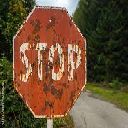


 Prediction Result:
  - Main Category: Road
  - Sub Category:  Issues Damaged Sign
  - Confidence:    98.42%


In [16]:
# --- Load Model from Pickle File ---
try:
    # Define the pickle filename
    pickle_filename = 'MlArtist_FinalModel.pkl'
    print(f"Loading model from {pickle_filename}...")

    # Open the file in read-binary mode and load the model
    with open(pickle_filename, 'rb') as file:
        best_model = pickle.load(file)

    print(" Best trained model loaded successfully from pickle file.")
except Exception as e:
    print(f" Error loading model from pickle file: {e}")
    best_model = None


# --- Prediction Function ---
# This function uses the global 'anonymize_image' function defined in a previous cell.
def predict_on_upload(model_to_use, train_gen):
    if model_to_use is None:
        print("Model is not loaded. Cannot predict.")
        return

    # Create the label map from the training generator
    class_indices = train_gen.class_indices
    labels_map = {v: k for k, v in class_indices.items()}

    # Upload files
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"\n--- Analyzing '{filename}' ---")
        try:
            # Load the image for processing
            img = tf.keras.preprocessing.image.load_img(filename, target_size=(128, 128))
            img_array_rgb = tf.keras.preprocessing.image.img_to_array(img)

            # Anonymize the image using our function (which returns a float32 array)
            anonymized_array_float = anonymize_image(img_array_rgb)

            # Prepare the image for the model (rescale and add batch dimension)
            img_batch = np.expand_dims(anonymized_array_float, axis=0)
            img_preprocessed = img_batch / 255.0  # Rescale float[0,255] to float[0,1]

            # Make the prediction
            prediction = model_to_use.predict(img_preprocessed)

            predicted_index = np.argmax(prediction[0])
            predicted_label = labels_map[predicted_index]
            confidence = np.max(prediction[0]) * 100

            main_category, sub_category = predicted_label.split('_', 1)

            # --- Display the results ---
            print("\n Anonymized Input Image:")

            # For display, convert the float array back to a uint8 BGR image for cv2_imshow
            display_img_uint8 = anonymized_array_float.astype(np.uint8)
            display_img_bgr = cv2.cvtColor(display_img_uint8, cv2.COLOR_RGB2BGR)
            cv2_imshow(display_img_bgr)

            print(f"\n Prediction Result:")
            print(f"  - Main Category: {main_category}")
            print(f"  - Sub Category:  {sub_category.replace('_', ' ')}")
            print(f"  - Confidence:    {confidence:.2f}%")

        except Exception as e:
            print(f"Error processing {filename}: {e}")


# --- Run Prediction ---
# This check ensures that the model has been loaded and the generators exist
if 'best_model' in locals() and best_model is not None and 'train_generator' in locals():
    print("\nReady to predict! Use the button below to upload an image.")
    predict_on_upload(best_model, train_generator)
else:
    print("\nCannot run prediction. Ensure the model was trained and data generators were created.")

Loading model from MlArtist_FinalModel.pkl...
 Best trained model loaded successfully from pickle file.

Ready to predict! Use the button below to upload an image.


Saving vandalism.jpg to vandalism.jpg

--- Analyzing 'vandalism.jpg' ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step

 Anonymized Input Image:


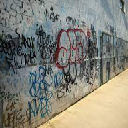


 Prediction Result:
  - Main Category: Vandalism
  - Sub Category:  Graffiti
  - Confidence:    99.57%


In [17]:
# --- Load Model from Pickle File ---
try:
    # Define the pickle filename
    pickle_filename = 'MlArtist_FinalModel.pkl'
    print(f"Loading model from {pickle_filename}...")

    # Open the file in read-binary mode and load the model
    with open(pickle_filename, 'rb') as file:
        best_model = pickle.load(file)

    print(" Best trained model loaded successfully from pickle file.")
except Exception as e:
    print(f" Error loading model from pickle file: {e}")
    best_model = None


# --- Prediction Function ---
# This function uses the global 'anonymize_image' function defined in a previous cell.
def predict_on_upload(model_to_use, train_gen):
    if model_to_use is None:
        print("Model is not loaded. Cannot predict.")
        return

    # Create the label map from the training generator
    class_indices = train_gen.class_indices
    labels_map = {v: k for k, v in class_indices.items()}

    # Upload files
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"\n--- Analyzing '{filename}' ---")
        try:
            # Load the image for processing
            img = tf.keras.preprocessing.image.load_img(filename, target_size=(128, 128))
            img_array_rgb = tf.keras.preprocessing.image.img_to_array(img)

            # Anonymize the image using our function (which returns a float32 array)
            anonymized_array_float = anonymize_image(img_array_rgb)

            # Prepare the image for the model (rescale and add batch dimension)
            img_batch = np.expand_dims(anonymized_array_float, axis=0)
            img_preprocessed = img_batch / 255.0  # Rescale float[0,255] to float[0,1]

            # Make the prediction
            prediction = model_to_use.predict(img_preprocessed)

            predicted_index = np.argmax(prediction[0])
            predicted_label = labels_map[predicted_index]
            confidence = np.max(prediction[0]) * 100

            main_category, sub_category = predicted_label.split('_', 1)

            # --- Display the results ---
            print("\n Anonymized Input Image:")

            # For display, convert the float array back to a uint8 BGR image for cv2_imshow
            display_img_uint8 = anonymized_array_float.astype(np.uint8)
            display_img_bgr = cv2.cvtColor(display_img_uint8, cv2.COLOR_RGB2BGR)
            cv2_imshow(display_img_bgr)

            print(f"\n Prediction Result:")
            print(f"  - Main Category: {main_category}")
            print(f"  - Sub Category:  {sub_category.replace('_', ' ')}")
            print(f"  - Confidence:    {confidence:.2f}%")

        except Exception as e:
            print(f"Error processing {filename}: {e}")


# --- Run Prediction ---
# This check ensures that the model has been loaded and the generators exist
if 'best_model' in locals() and best_model is not None and 'train_generator' in locals():
    print("\nReady to predict! Use the button below to upload an image.")
    predict_on_upload(best_model, train_generator)
else:
    print("\nCannot run prediction. Ensure the model was trained and data generators were created.")

Loading model from MlArtist_FinalModel.pkl...
 Best trained model loaded successfully from pickle file.

Ready to predict! Use the button below to upload an image.


Saving vandalism2.jpg to vandalism2.jpg

--- Analyzing 'vandalism2.jpg' ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step

 Anonymized Input Image:


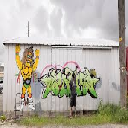


 Prediction Result:
  - Main Category: Vandalism
  - Sub Category:  Graffiti
  - Confidence:    99.91%


In [18]:
# --- Load Model from Pickle File ---
try:
    # Define the pickle filename
    pickle_filename = 'MlArtist_FinalModel.pkl'
    print(f"Loading model from {pickle_filename}...")

    # Open the file in read-binary mode and load the model
    with open(pickle_filename, 'rb') as file:
        best_model = pickle.load(file)

    print(" Best trained model loaded successfully from pickle file.")
except Exception as e:
    print(f" Error loading model from pickle file: {e}")
    best_model = None


# --- Prediction Function ---
# This function uses the global 'anonymize_image' function defined in a previous cell.
def predict_on_upload(model_to_use, train_gen):
    if model_to_use is None:
        print("Model is not loaded. Cannot predict.")
        return

    # Create the label map from the training generator
    class_indices = train_gen.class_indices
    labels_map = {v: k for k, v in class_indices.items()}

    # Upload files
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"\n--- Analyzing '{filename}' ---")
        try:
            # Load the image for processing
            img = tf.keras.preprocessing.image.load_img(filename, target_size=(128, 128))
            img_array_rgb = tf.keras.preprocessing.image.img_to_array(img)

            # Anonymize the image using our function (which returns a float32 array)
            anonymized_array_float = anonymize_image(img_array_rgb)

            # Prepare the image for the model (rescale and add batch dimension)
            img_batch = np.expand_dims(anonymized_array_float, axis=0)
            img_preprocessed = img_batch / 255.0  # Rescale float[0,255] to float[0,1]

            # Make the prediction
            prediction = model_to_use.predict(img_preprocessed)

            predicted_index = np.argmax(prediction[0])
            predicted_label = labels_map[predicted_index]
            confidence = np.max(prediction[0]) * 100

            main_category, sub_category = predicted_label.split('_', 1)

            # --- Display the results ---
            print("\n Anonymized Input Image:")

            # For display, convert the float array back to a uint8 BGR image for cv2_imshow
            display_img_uint8 = anonymized_array_float.astype(np.uint8)
            display_img_bgr = cv2.cvtColor(display_img_uint8, cv2.COLOR_RGB2BGR)
            cv2_imshow(display_img_bgr)

            print(f"\n Prediction Result:")
            print(f"  - Main Category: {main_category}")
            print(f"  - Sub Category:  {sub_category.replace('_', ' ')}")
            print(f"  - Confidence:    {confidence:.2f}%")

        except Exception as e:
            print(f"Error processing {filename}: {e}")


# --- Run Prediction ---
# This check ensures that the model has been loaded and the generators exist
if 'best_model' in locals() and best_model is not None and 'train_generator' in locals():
    print("\nReady to predict! Use the button below to upload an image.")
    predict_on_upload(best_model, train_generator)
else:
    print("\nCannot run prediction. Ensure the model was trained and data generators were created.")